# Simulation results
## Full run for scenario 3 - Infinite demand for historical transactions

#### Maria Silva, May 2025

## 1. Imports and settings

Let's start by importing the necessary libraries and setting up some directories and files.


In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

In [2]:
# plotting theme
sns.set_theme(
    style="whitegrid", palette="Set2", rc={"figure.dpi": 500, "axes.titlesize": 15}
)
meanprops_small = {
    "markerfacecolor": "white",
    "markeredgecolor": "grey",
    "markersize": "6",
}
meanprops_big = {
    "markerfacecolor": "white",
    "markeredgecolor": "grey",
    "markersize": "8",
}

In [3]:
# Main directories and files
current_path = os.getcwd()
repo_dir = os.path.abspath(os.path.join(current_path, ".."))
data_dir = os.path.join(repo_dir, "data")
sim_dir = os.path.join(data_dir, "sim")

In [4]:
meter_names_map = {
    'one_dim_scheme': 'One-dimenisonal', 
    'compute_vs_others': 'Compute vs. Others', 
    'state_vs_others': 'State vs. Others',
    'access_vs_others': 'Access vs. Others', 
    'bandwidth_vs_others': 'Bandwidth vs. Others',
    'state_vs_compute_vs_others': 'State vs. Compute vs. Others',
    'state_vs_compute_vs_access_vs_others': 'State vs. Compute vs. Access vs. Others'
}
meter_names_map_v2 = {
    'one_dim_scheme': 'One-dimenisonal', 
    'compute_vs_others': 'Compute vs. Others', 
    'state_vs_others': 'State vs. Others',
    'access_vs_others': 'Access vs. Others', 
    'bandwidth_vs_others': 'Bandwidth vs. Others',
    'state_vs_compute_vs_others': 'State vs. Compute vs. Others',
    'state_vs_compute_vs_access_vs_others': 'State vs. Compute vs. \n Access vs. Others'
}

## 2. Load simulation results

Now, we need to read the csv files that contain the results from the simulation results.

In [5]:
file_name = "historical_txs_sim_results_demand=infinite.csv"
raw_df = pd.read_csv(os.path.join(sim_dir, file_name))
raw_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   iter                 1400000 non-null  int64  
 1   block                1400000 non-null  int64  
 2   utilization          1400000 non-null  float64
 3   gas_used             1400000 non-null  float64
 4   one_dim_utilization  1400000 non-null  float64
 5   throughput           1400000 non-null  int64  
 6   mempool_size         1400000 non-null  float64
 7   demand_type          1400000 non-null  object 
 8   demand_mul           0 non-null        float64
 9   meter_scheme         1400000 non-null  object 
 10  limit                1400000 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 117.5+ MB


In [6]:
df = raw_df.copy()

df["gas_used_million"] = df["gas_used"]/1e6
df["Limit"] =np.where(df["limit"]==36000000, "36M", "18M")
df["meter_scheme_v2"] = df["meter_scheme"].map(meter_names_map_v2)
df["meter_scheme"] = df["meter_scheme"].map(meter_names_map)
df["is_mempool_empty"] = df["mempool_size"]==0

df = df.drop(columns=["demand_mul", "demand_type"])

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   iter                 1400000 non-null  int64  
 1   block                1400000 non-null  int64  
 2   utilization          1400000 non-null  float64
 3   gas_used             1400000 non-null  float64
 4   one_dim_utilization  1400000 non-null  float64
 5   throughput           1400000 non-null  int64  
 6   mempool_size         1400000 non-null  float64
 7   meter_scheme         1400000 non-null  object 
 8   limit                1400000 non-null  float64
 9   gas_used_million     1400000 non-null  float64
 10  Limit                1400000 non-null  object 
 11  meter_scheme_v2      1400000 non-null  object 
 12  is_mempool_empty     1400000 non-null  bool   
dtypes: bool(1), float64(6), int64(3), object(3)
memory usage: 129.5+ MB


In [7]:
df_36 = df[df["Limit"]=="36M"]
df_18 = df[df["Limit"]=="18M"]

In [8]:
# Compute average per iteration
agg_df = (
    df
    .drop(columns=["iter"])
    .groupby(["block","meter_scheme", "meter_scheme_v2","Limit"])
    .mean()
    .reset_index()
    )
agg_df_36 = agg_df[agg_df["Limit"]=="36M"]
agg_df_18 = agg_df[agg_df["Limit"]=="18M"]

In [9]:
scenario_title = "Scenario 3: Infinite demand for historical transactions"
meter_order = df["meter_scheme"].unique().tolist()
meter_order_v2 = df["meter_scheme_v2"].unique().tolist()

## 3. Utilization

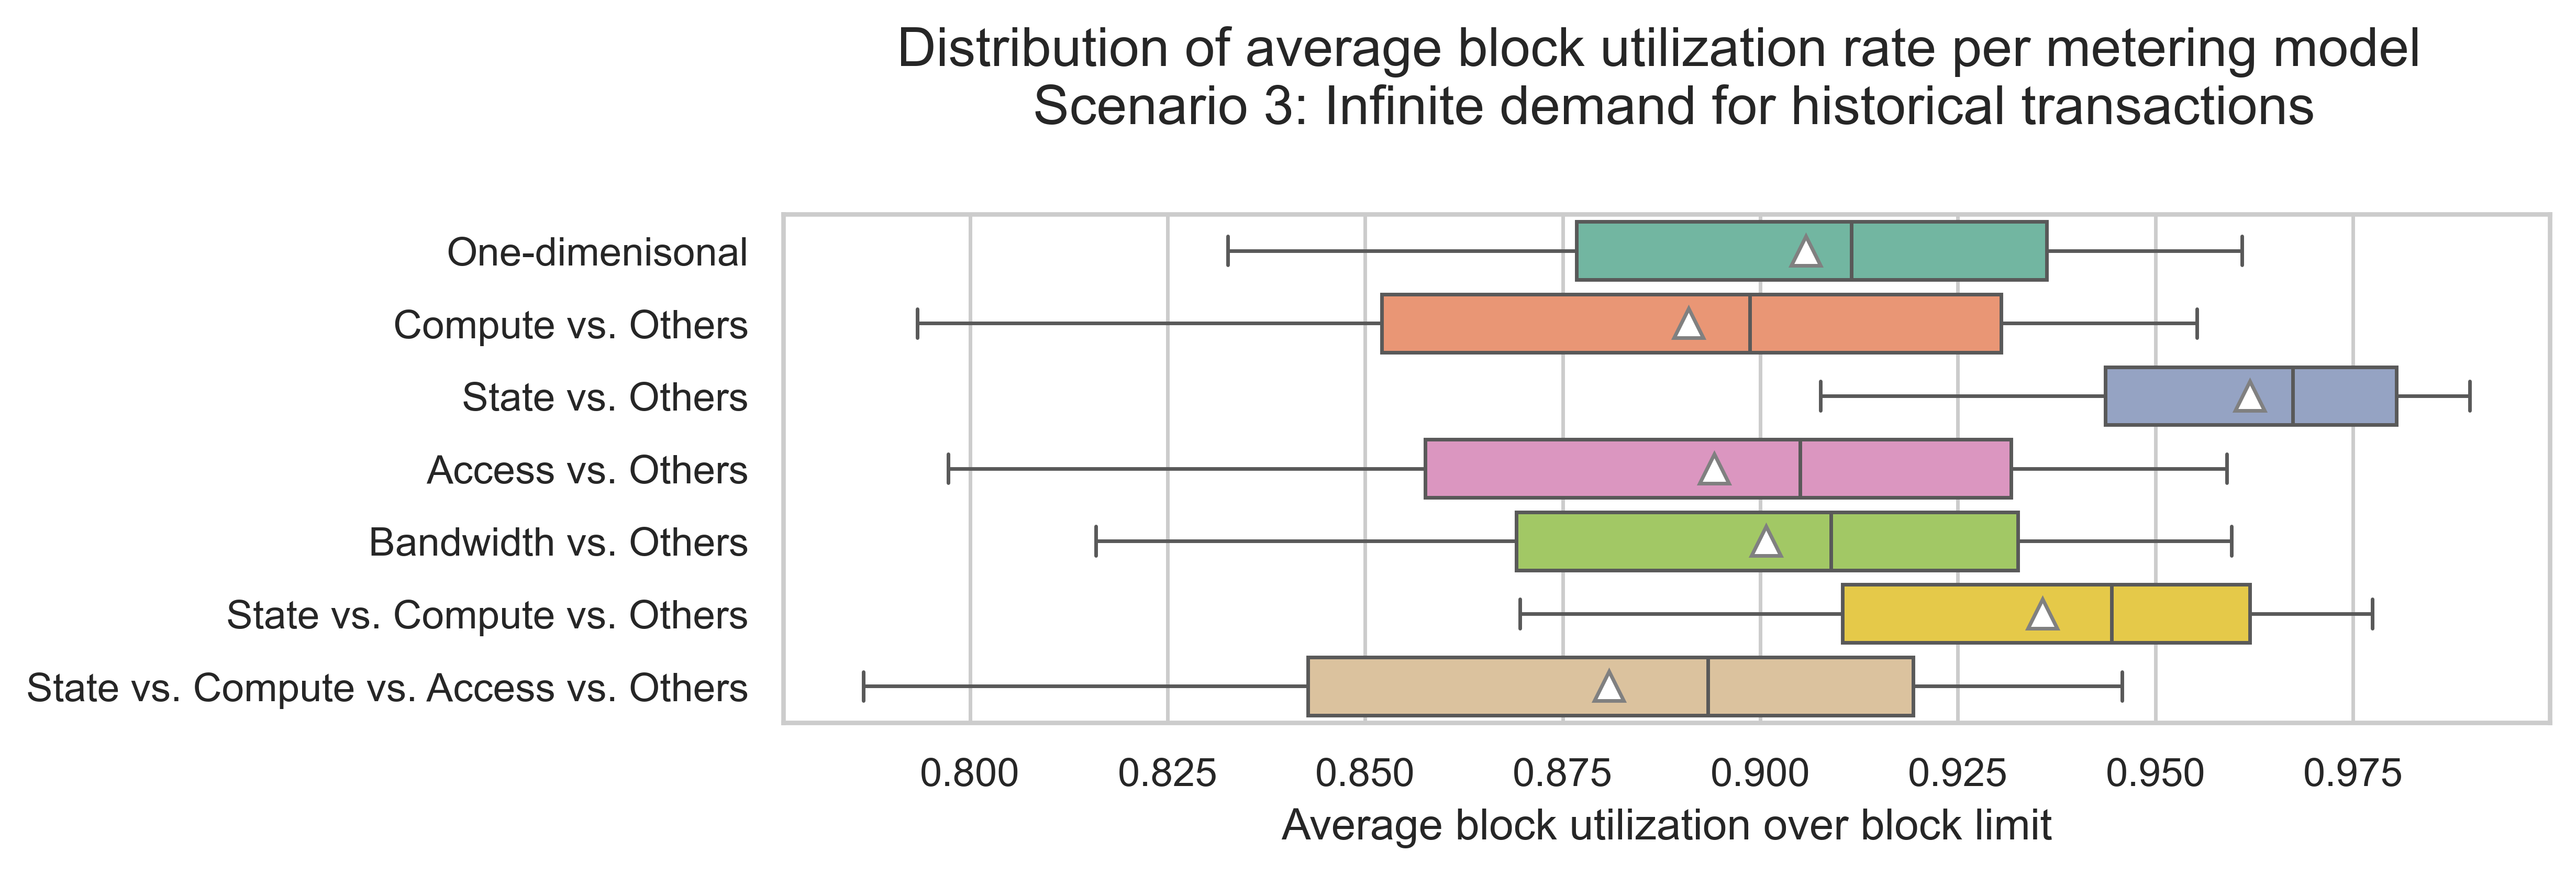

In [10]:
plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_df,
    x="utilization",
    y="meter_scheme",
    hue="meter_scheme",
    order=meter_order,
    hue_order=meter_order,
    legend=False,
    showmeans=True,
    meanprops=meanprops_big,
)
plt.xlabel("Average block utilization over block limit")
plt.ylabel("")
plt.title(
    f"Distribution of average block utilization rate per metering model \n {scenario_title}",
    pad=25,
)
plt.tight_layout()
plt.show()

## 4. Throughput

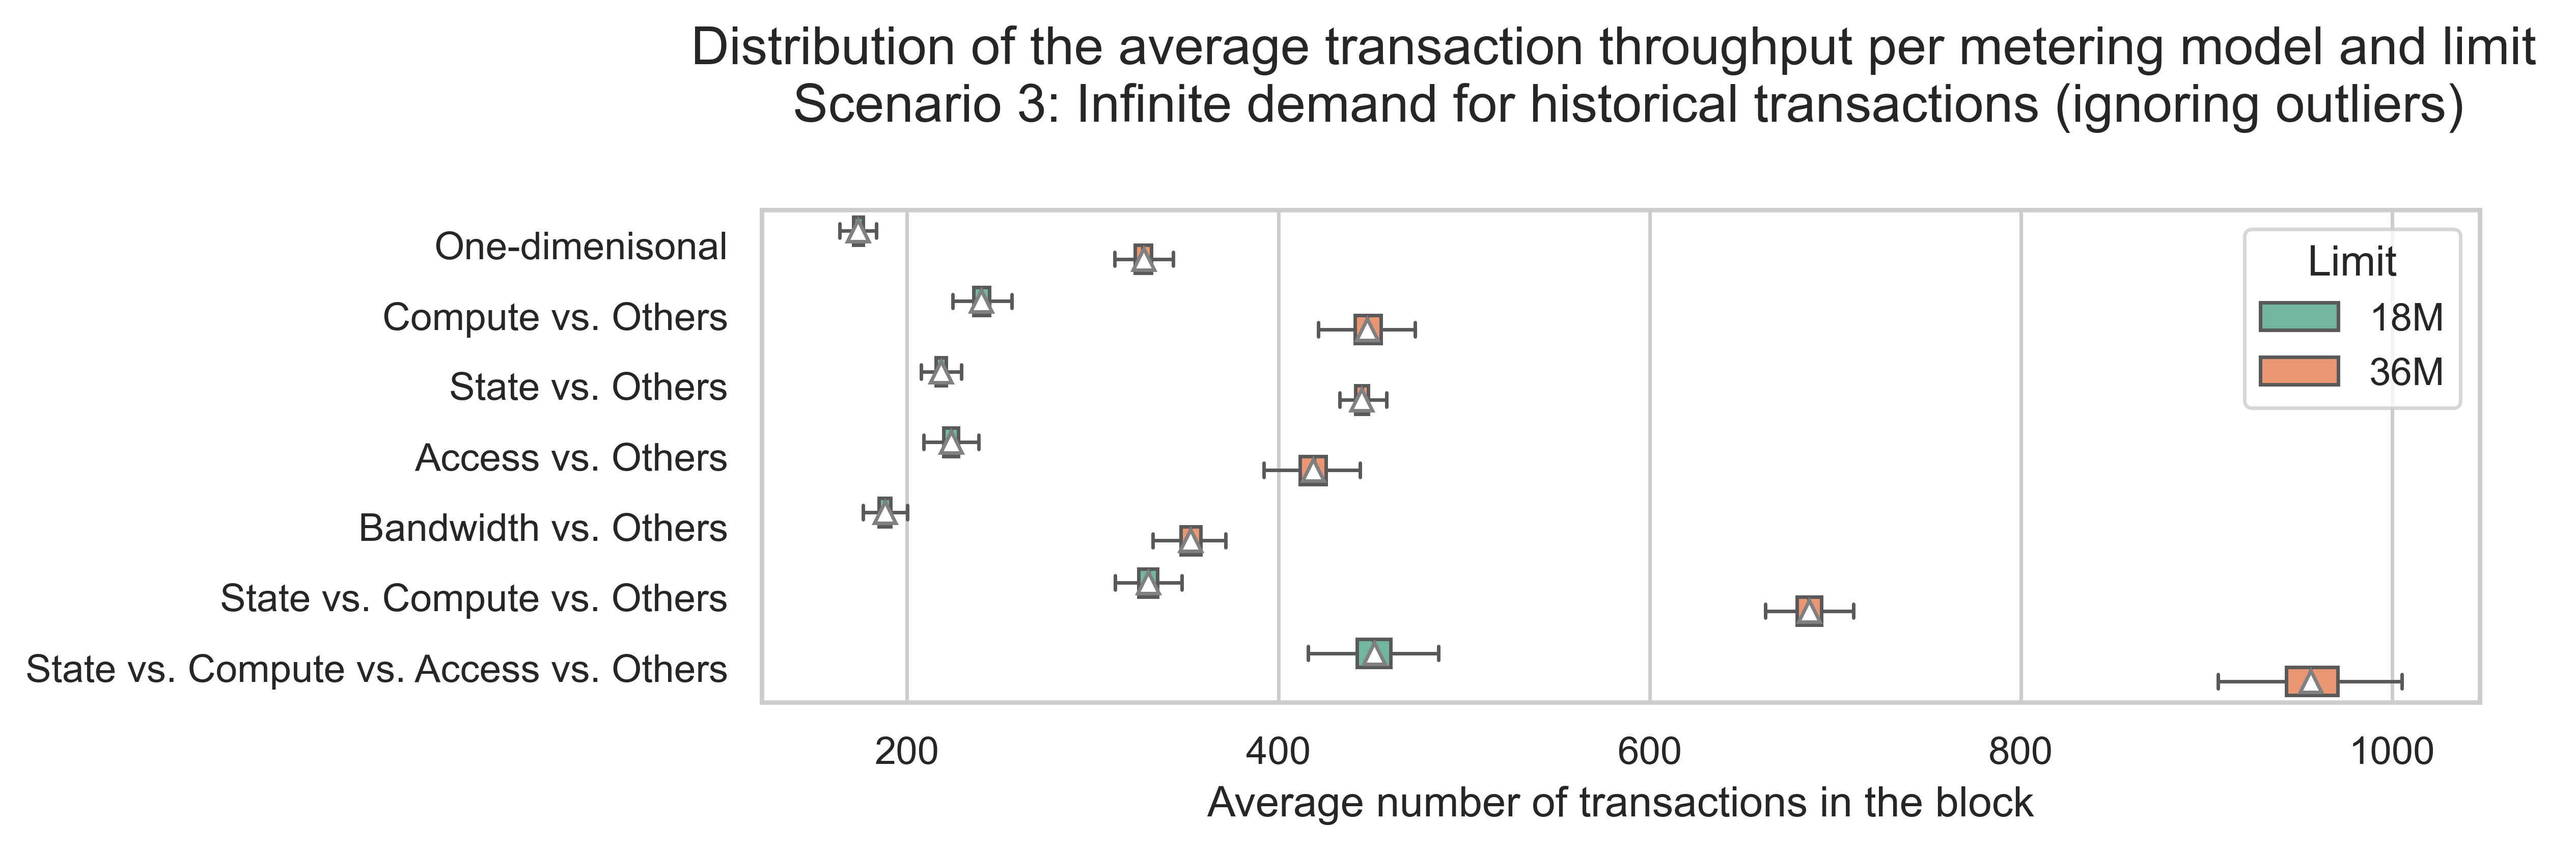

In [11]:
plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_df,
    x="throughput",
    y="meter_scheme",
    hue="Limit",
    palette="Set2",
    order=meter_order,
    showfliers=False,
    showmeans=True,
    meanprops=meanprops_small,
)
plt.xlabel("Average number of transactions in the block")
plt.ylabel("")
plt.title(
    f"Distribution of the average transaction throughput per metering model and limit \n {scenario_title} (ignoring outliers)",
    pad=25,
)
plt.tight_layout()
plt.show()

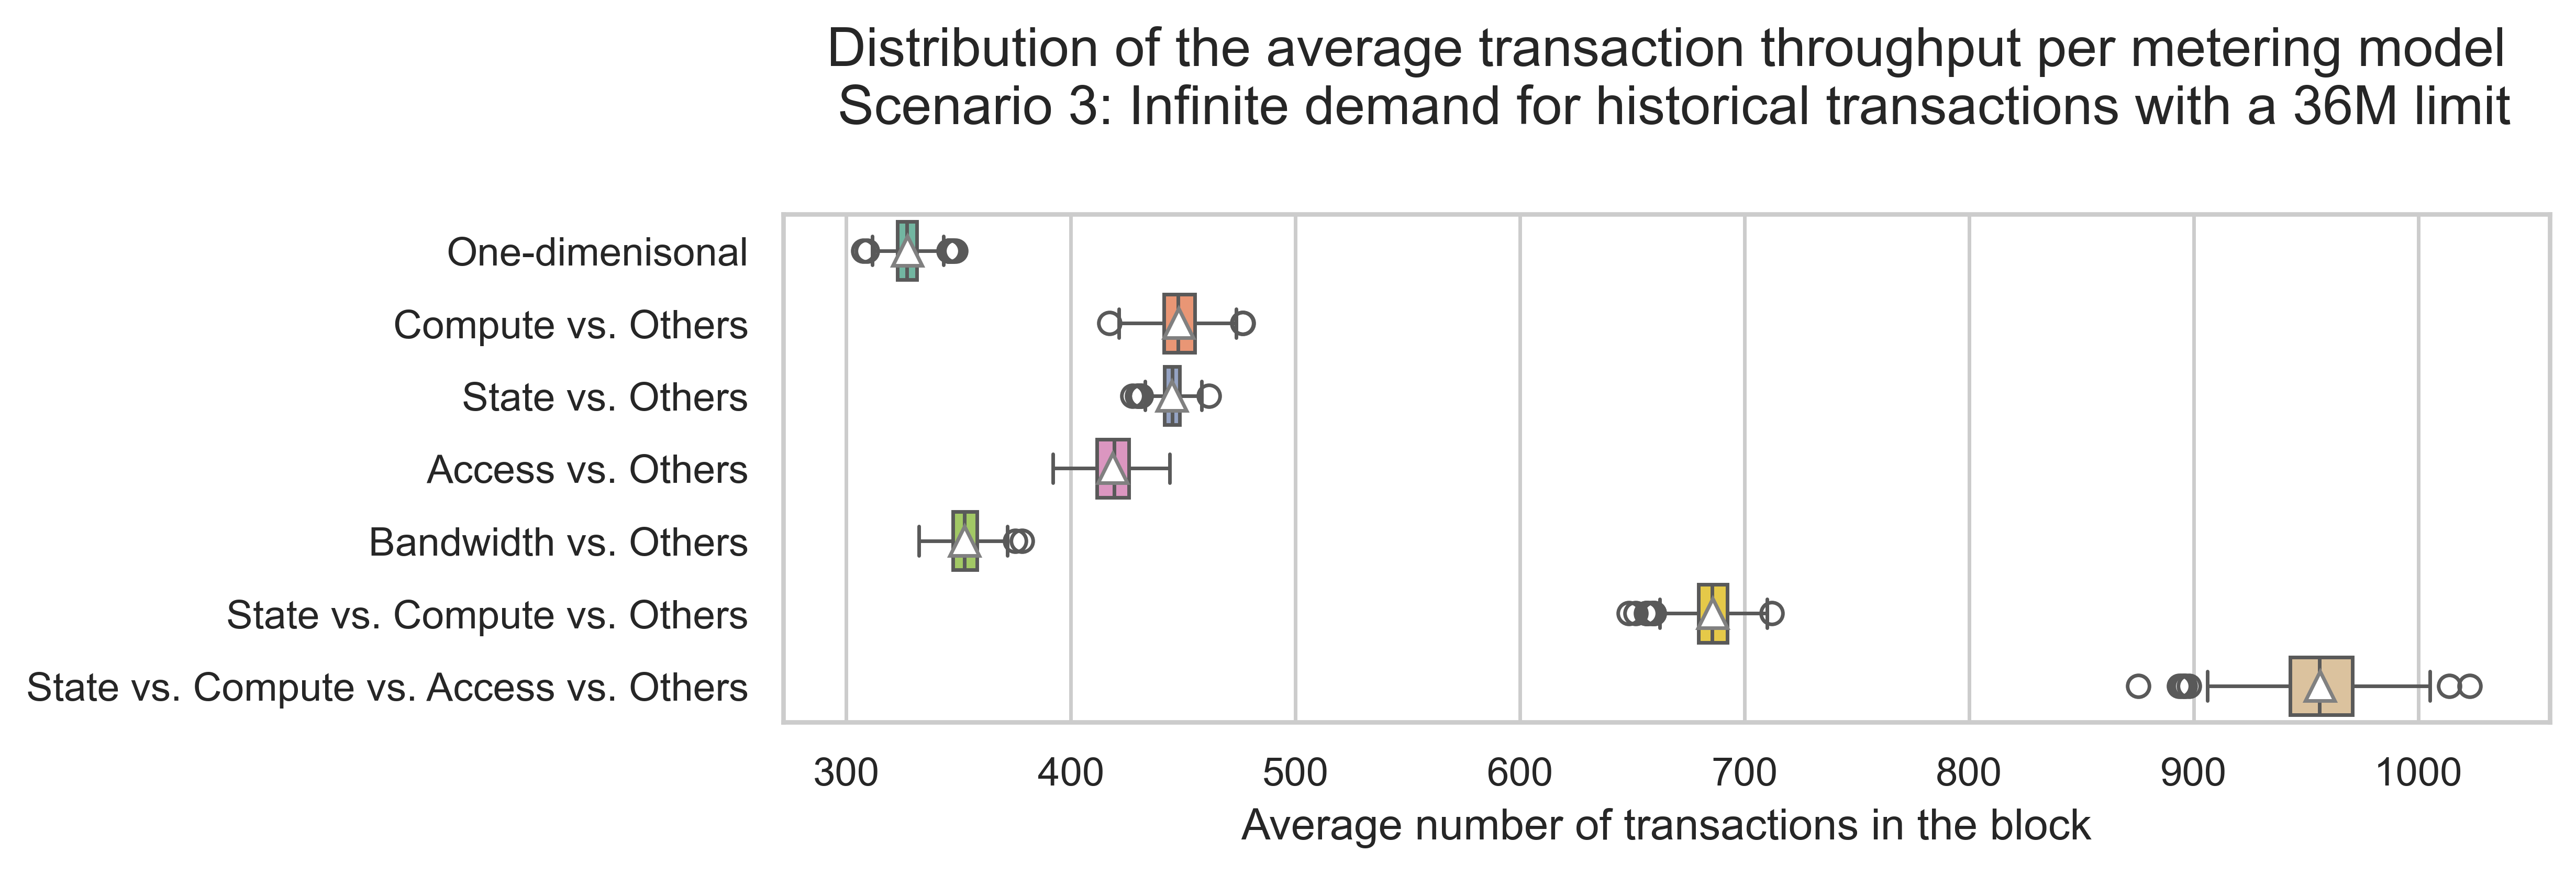

In [12]:
plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_df_36,
    x="throughput",
    y="meter_scheme",
    hue="meter_scheme",
    palette="Set2",
    order=meter_order,
    hue_order=meter_order,
    # showfliers=False,
    showmeans=True,
    meanprops=meanprops_big,
)
plt.xlabel("Average number of transactions in the block")
plt.ylabel("")
plt.title(
    f"Distribution of the average transaction throughput per metering model"
    f"\n {scenario_title} with a 36M limit",
    pad=25,
)
plt.tight_layout()
plt.show()

In [13]:
agg_df.groupby(["meter_scheme", "Limit"])["throughput"].agg(["mean", "std", "median"]).loc[meter_order].head(15)

mean        std    median
meter_scheme                            Limit                                
One-dimenisonal                         18M    173.55422   3.911350  173.5625
                                        36M    327.30532   7.053508  326.8950
Compute vs. Others                      18M    239.86623   6.236490  239.8350
                                        36M    447.94798  10.147362  447.7200
State vs. Others                        18M    218.31719   4.244478  218.2100
                                        36M    444.89327   5.305488  445.2400
Access vs. Others                       18M    223.62673   5.850774  223.6750
                                        36M    418.68747   9.365634  419.4175
Bandwidth vs. Others                    18M    187.98122   4.666856  188.0000
                                        36M    352.70009   7.933586  352.6625
State vs. Compute vs. Others            18M    329.87972   7.223366  330.1275
                                        36M    685.82955  10.429591  685.6925
State vs. Compute vs. Access vs. Others 18M    451.56524  13.740839  451.4900
                                        36M    956.28486  21.151335  956.0550

In [14]:
temp = agg_df_36[["block", "meter_scheme", "throughput"]]
one_dim_temp = (
    temp[temp["meter_scheme"] == "One-dimenisonal"]
    .drop(columns="meter_scheme")
    .rename(columns={"throughput": "throughput_one_dim"})
)
temp = temp.merge(one_dim_temp, on="block", how="left")
temp["throughput_gain"] = temp["throughput"] / temp["throughput_one_dim"] - 1
temp.groupby("meter_scheme")["throughput_gain"].agg(["mean", "std", "median"]).loc[meter_order]

,mean,std,median
meter_scheme,,,
One-dimenisonal,0.000000,0.000000,0.000000
Compute vs. Others,0.369169,0.040845,0.368334
State vs. Others,0.359888,0.033404,0.361131
Access vs. Others,0.279783,0.039639,0.278829
Bandwidth vs. Others,0.078106,0.034188,0.078866
State vs. Compute vs. Others,1.096352,0.055179,1.097520
State vs. Compute vs. Access vs. Others,1.922931,0.086597,1.924770


## 5. Gas used

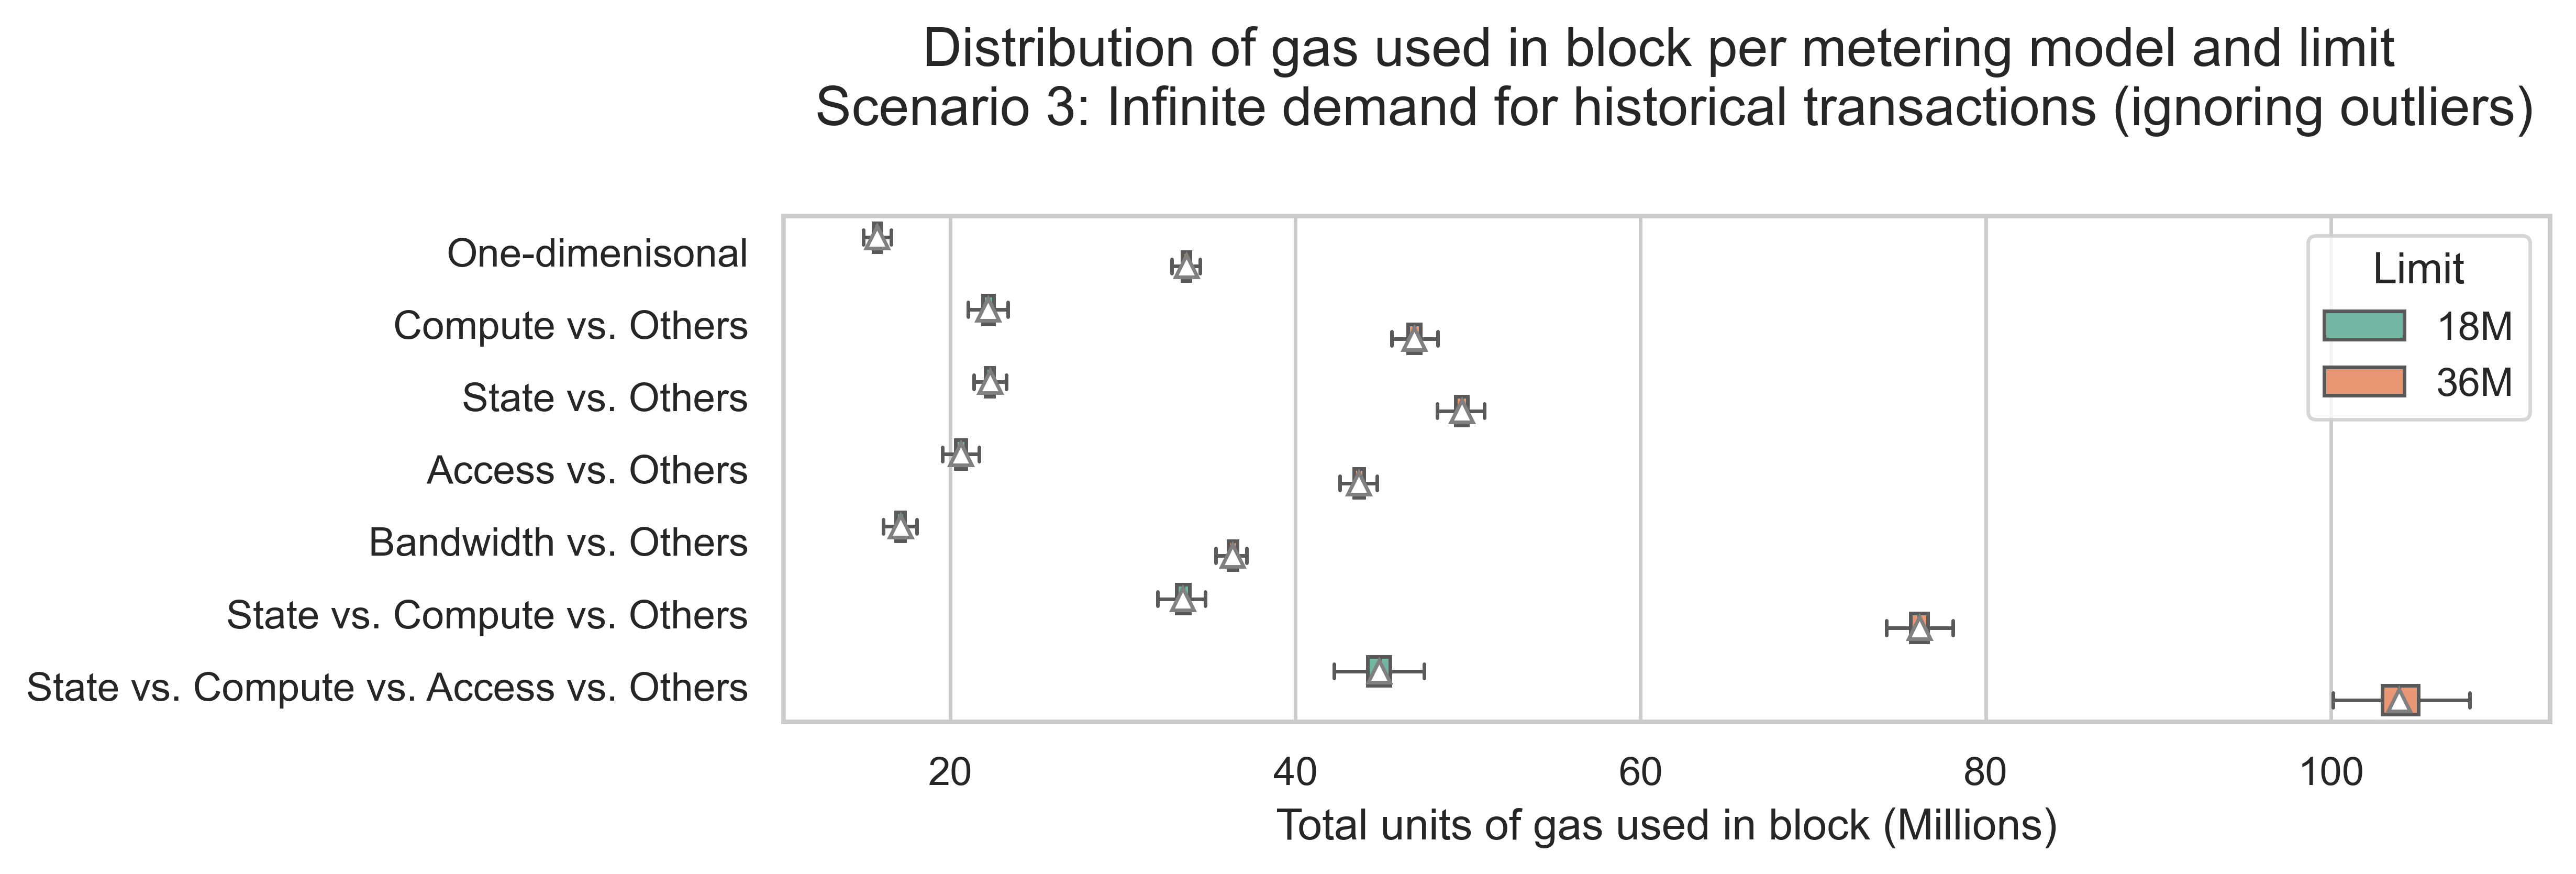

In [15]:
plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_df,
    x="gas_used_million",
    y="meter_scheme",
    hue="Limit",
    palette="Set2",
    order=meter_order,
    showfliers=False,
    showmeans=True,
    meanprops=meanprops_small,
)
plt.xlabel("Total units of gas used in block (Millions)")
plt.ylabel("")
plt.title(
    f"Distribution of gas used in block per metering model and limit \n {scenario_title} (ignoring outliers)",
    pad=25,
)
plt.tight_layout()
plt.show()

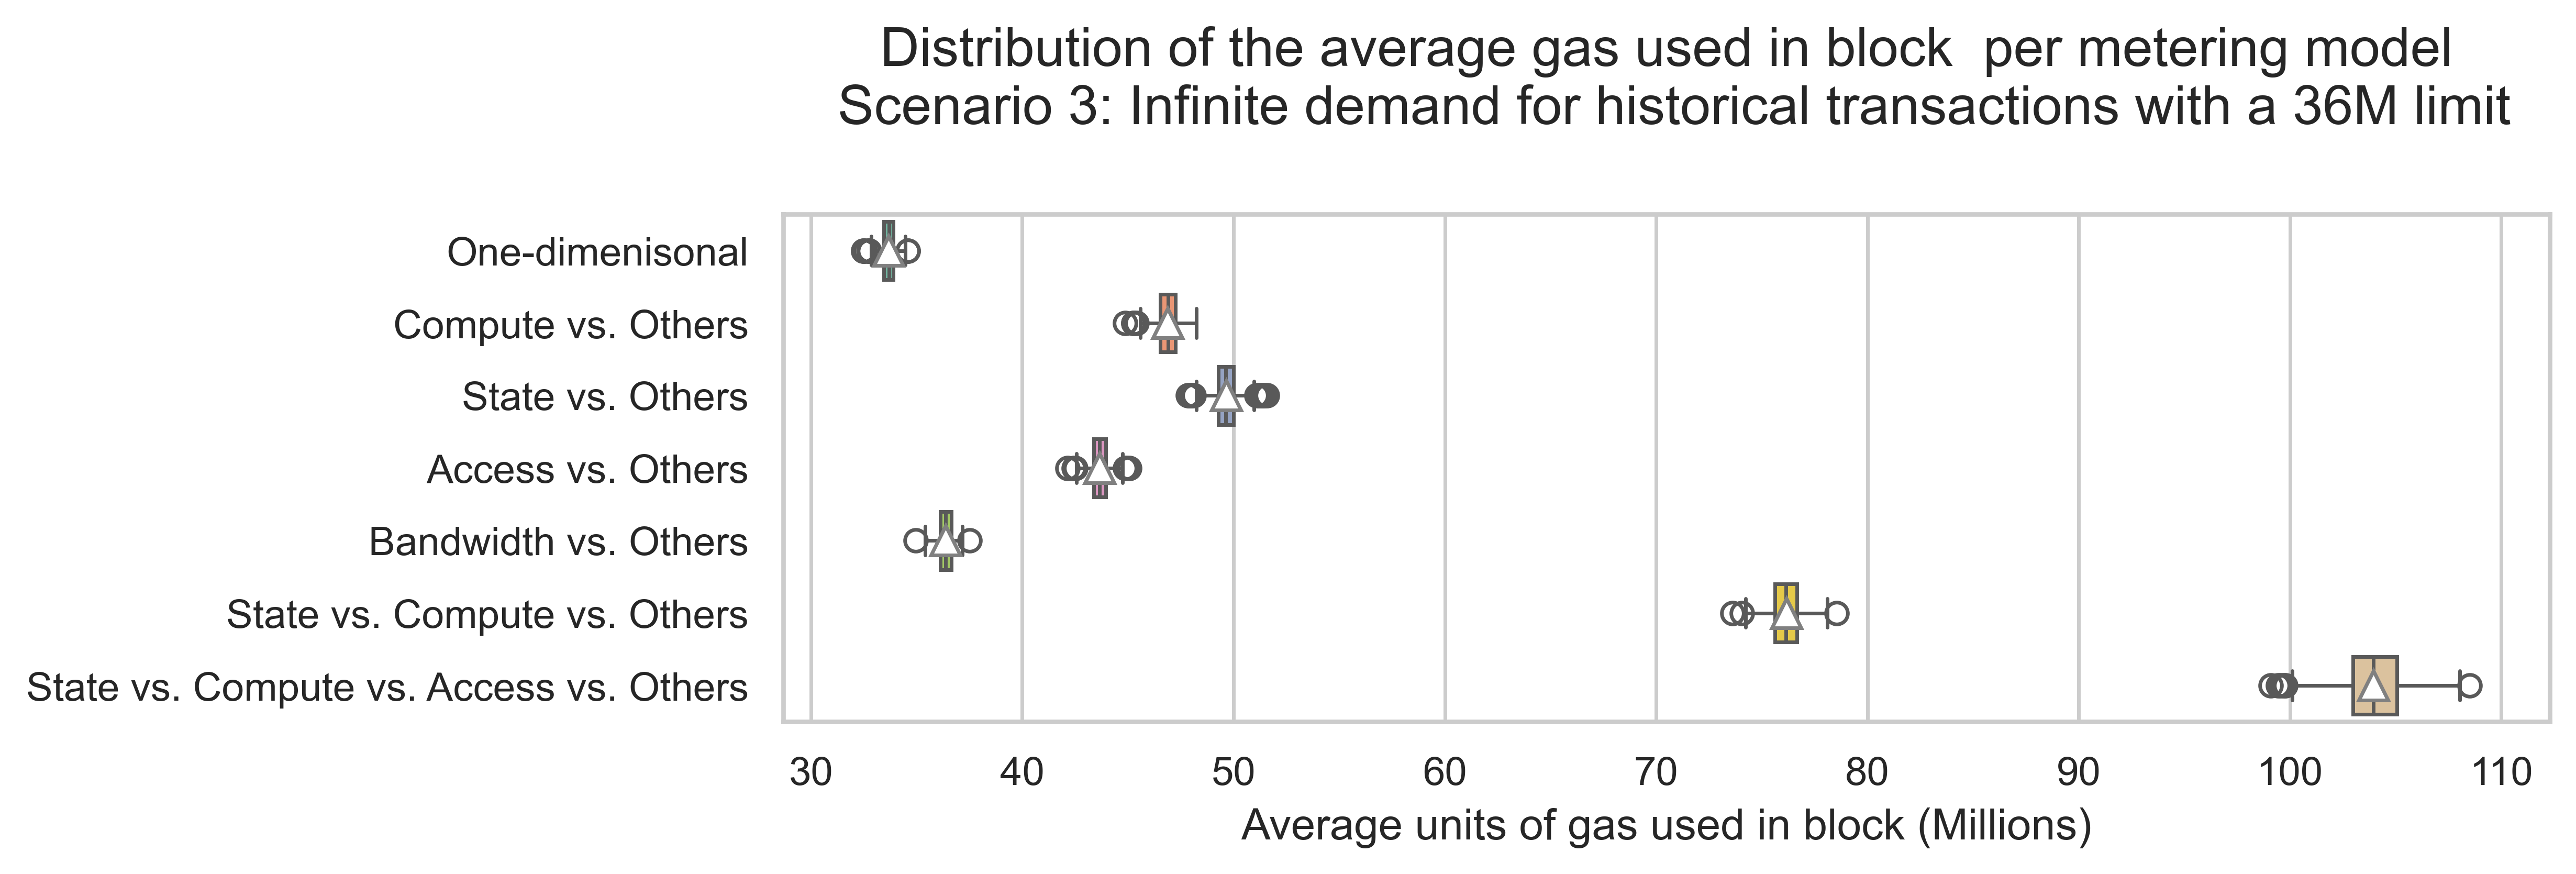

In [16]:
plt.figure(figsize=(10, 3.5))
sns.boxplot(
    data=agg_df_36,
    x="gas_used_million",
    y="meter_scheme",
    hue="meter_scheme",
    palette="Set2",
    order=meter_order,
    hue_order=meter_order,
    # showfliers=False,
    showmeans=True,
    meanprops=meanprops_big,
)
plt.xlabel("Average units of gas used in block (Millions)")
plt.ylabel("")
plt.title(
    f"Distribution of the average gas used in block  per metering model"
    f"\n {scenario_title} with a 36M limit",
    pad=25,
)
plt.tight_layout()
plt.show()

In [17]:
df.groupby(["meter_scheme", "Limit"])["gas_used_million"].agg(["mean", "std", "median"]).loc[meter_order]

mean        std  \
meter_scheme                            Limit                          
One-dimenisonal                         18M     15.768766   4.355896   
                                        36M     33.678250   4.771537   
Compute vs. Others                      18M     22.199554   6.890317   
                                        36M     46.888065   7.281407   
State vs. Others                        18M     22.299227   5.283559   
                                        36M     49.643282   8.678157   
Access vs. Others                       18M     20.615273   6.221989   
                                        36M     43.663980   6.439728   
Bandwidth vs. Others                    18M     17.112983   4.886797   
                                        36M     36.369617   5.268547   
State vs. Compute vs. Others            18M     33.482722   8.522863   
                                        36M     76.155622  10.486966   
State vs. Compute vs. Access vs. Others 18M     44.863848  14.893149   
                                        36M    103.936433  21.537984   

                                                   median  
meter_scheme                            Limit              
One-dimenisonal                         18M     17.871955  
                                        36M     35.876220  
Compute vs. Others                      18M     25.492643  
                                        36M     48.097884  
State vs. Others                        18M     21.462917  
                                        36M     45.323912  
Access vs. Others                       18M     23.543408  
                                        36M     45.318129  
Bandwidth vs. Others                    18M     19.430996  
                                        36M     38.634660  
State vs. Compute vs. Others            18M     34.687590  
                                        36M     76.174450  
State vs. Compute vs. Access vs. Others 18M     49.678455  
                                        36M    110.072633

In [18]:
temp = agg_df_36[["block", "meter_scheme", "gas_used_million"]]
one_dim_temp = (
    temp[temp["meter_scheme"] == "One-dimenisonal"]
    .drop(columns="meter_scheme")
    .rename(columns={"gas_used_million": "gas_one_dim"})
)
temp = temp.merge(one_dim_temp, on="block", how="left")
temp["gas_gain"] = temp["gas_used_million"] / temp["gas_one_dim"] - 1
temp.groupby("meter_scheme")["gas_gain"].agg(["mean", "std", "median"]).loc[meter_order]

,mean,std,median
meter_scheme,,,
One-dimenisonal,0.000000,0.000000,0.000000
Compute vs. Others,0.392377,0.021003,0.392538
State vs. Others,0.474195,0.023198,0.472827
Access vs. Others,0.296628,0.017946,0.296816
Bandwidth vs. Others,0.080030,0.016087,0.080083
State vs. Compute vs. Others,1.261498,0.031215,1.260546
State vs. Compute vs. Access vs. Others,2.086451,0.053285,2.088076
